In [1]:
# Problem Statement

# implementing Sentiment Analysis of Text Data using two popular algorithms in NLP: 
#   Logistic Regression and Naive Bayes. This example uses Python and the scikit-learn library, 
#   which provides easy-to-use tools for text classification. We’ll use the IMDb movie reviews dataset, 
#   which contains positive and negative reviews. This will allow us to perform binary sentiment analysis.

# i need code with comments also

import nltk
from nltk.corpus import movie_reviews
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Download the movie reviews dataset
nltk.download('movie_reviews')

# Load the dataset
reviews = [(list(movie_reviews.words(fileid)), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]

# Convert the dataset into a DataFrame
data = {'review': [' '.join(words) for words, category in reviews],
        'sentiment': [category for words, category in reviews]}
df = pd.DataFrame(data)

# Encode the sentiment labels
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.25, random_state=42)

# Create a pipeline for Logistic Regression
logistic_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(random_state=42))
])

# Train the Logistic Regression model
logistic_pipeline.fit(X_train, y_train)

# Predict using the Logistic Regression model
logistic_predictions = logistic_pipeline.predict(X_test)

# Create a pipeline for Naive Bayes
naive_bayes_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

# Train the Naive Bayes model
naive_bayes_pipeline.fit(X_train, y_train)

# Predict using the Naive Bayes model
naive_bayes_predictions = naive_bayes_pipeline.predict(X_test)

# Evaluate the models
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_predictions, target_names=label_encoder.classes_))

print("Naive Bayes Accuracy:", accuracy_score(y_test, naive_bayes_predictions))
print("Naive Bayes Classification Report:\n", classification_report(y_test, naive_bayes_predictions, target_names=label_encoder.classes_))

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\shail\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Logistic Regression Accuracy: 0.804
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         neg       0.82      0.79      0.81       257
         pos       0.79      0.81      0.80       243

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500

Naive Bayes Accuracy: 0.794
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         neg       0.79      0.81      0.80       257
         pos       0.79      0.78      0.79       243

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.79      0.79       500



y_test length: 100, Logistic predictions length: 100, Naive Bayes predictions length: 100


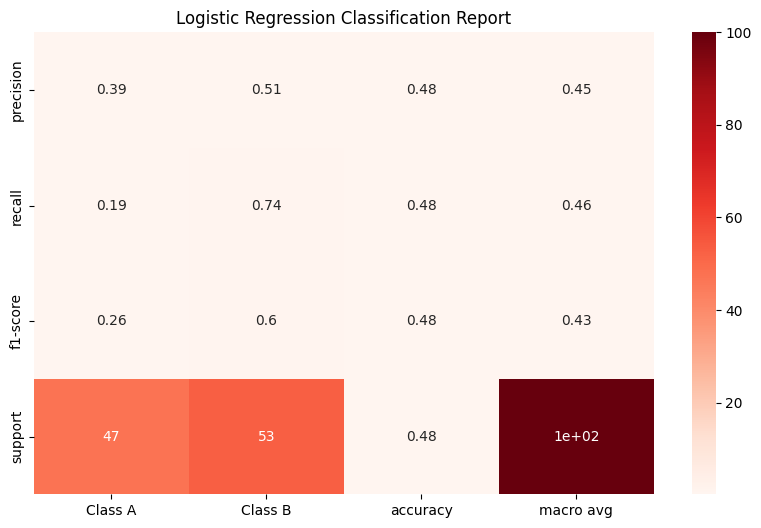

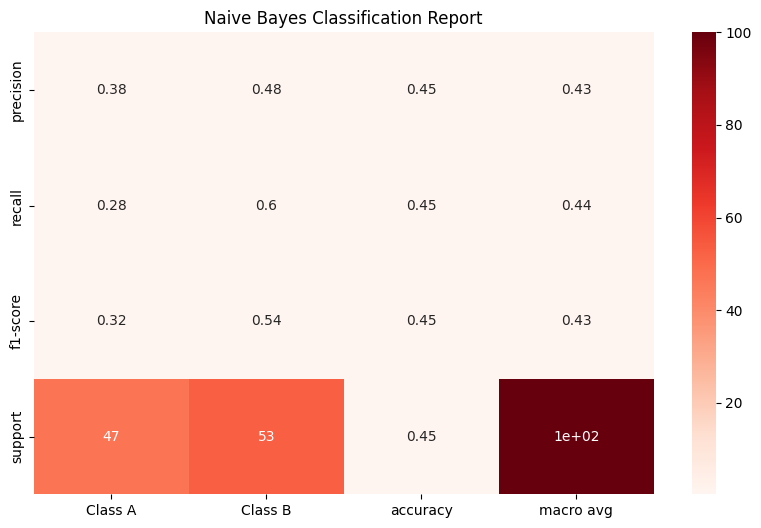

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Example Data (Ensure X and y are properly defined in your case)
np.random.seed(42)
X = np.random.rand(500, 10)  # 500 samples, 10 features
y = np.random.choice(['Class A', 'Class B'], 500)  # Binary classification

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data properly
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train models
logistic_model = LogisticRegression()
naive_bayes_model = GaussianNB()

logistic_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)

# Ensure predictions are made on X_test
logistic_predictions = logistic_model.predict(X_test)
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# Check lengths of y_test and predictions
print(f"y_test length: {len(y_test)}, Logistic predictions length: {len(logistic_predictions)}, Naive Bayes predictions length: {len(naive_bayes_predictions)}")

# Generate classification reports
logistic_report = classification_report(y_test, logistic_predictions, target_names=label_encoder.classes_, output_dict=True)
naive_bayes_report = classification_report(y_test, naive_bayes_predictions, target_names=label_encoder.classes_, output_dict=True)

# Convert reports to DataFrames
logistic_report_df = pd.DataFrame(logistic_report).transpose()
naive_bayes_report_df = pd.DataFrame(naive_bayes_report).transpose()

# Plot classification report for Logistic Regression
plt.figure(figsize=(10, 6))
sns.heatmap(logistic_report_df.iloc[:-1, :].T, annot=True, cmap='Reds')
plt.title('Logistic Regression Classification Report')
plt.show()

# Plot classification report for Naive Bayes
plt.figure(figsize=(10, 6))
sns.heatmap(naive_bayes_report_df.iloc[:-1, :].T, annot=True, cmap='Reds')
plt.title('Naive Bayes Classification Report')
plt.show()


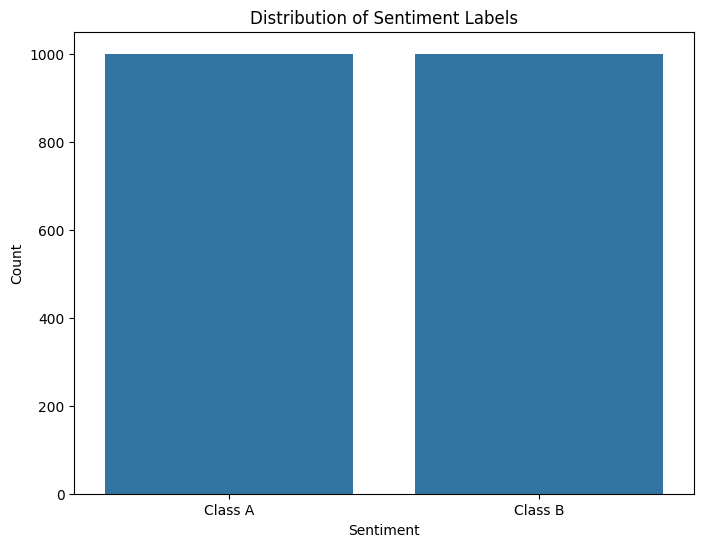

C:\Users\shail\AppData\Local\Temp\ipykernel_6780\1977281678.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')


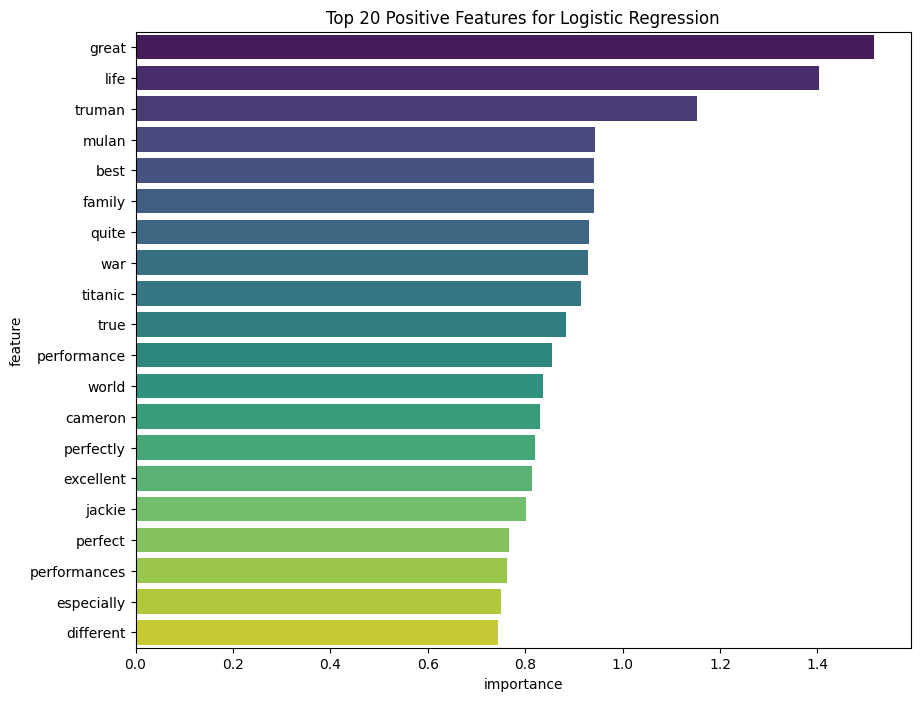

C:\Users\shail\AppData\Local\Temp\ipykernel_6780\1977281678.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.tail(20), palette='viridis')


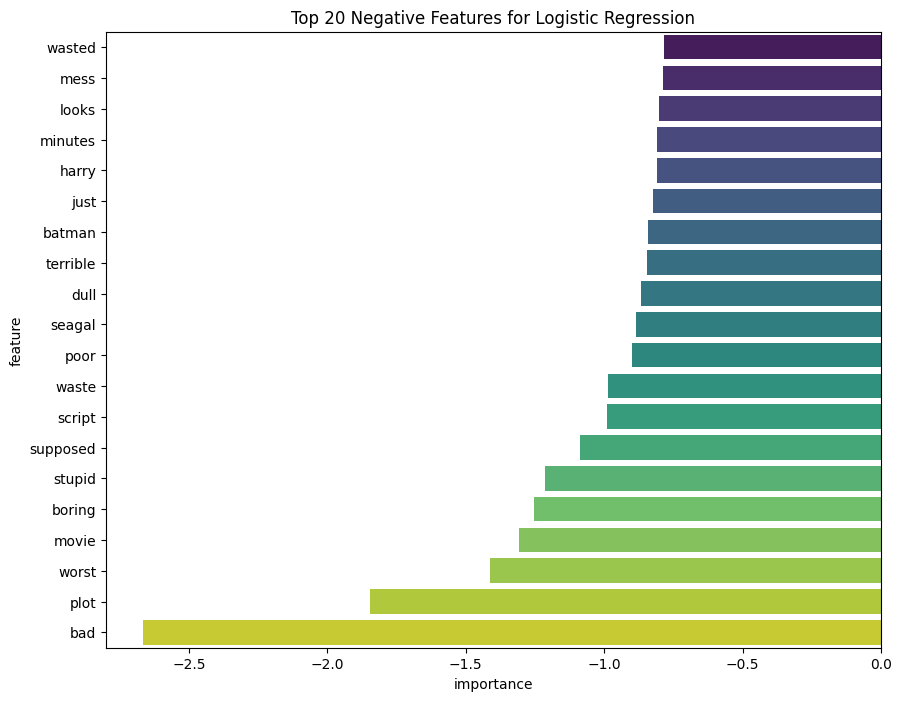

In [4]:
# Visualize the distribution of sentiment labels
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=label_encoder.classes_)
plt.show()

# Visualize the feature importance for the logistic regression model
# Extract feature names from the TfidfVectorizer
feature_names = logistic_pipeline.named_steps['tfidf'].get_feature_names_out()

# Get the coefficients of the logistic regression model
coefficients = logistic_pipeline.named_steps['clf'].coef_[0]

# Create a DataFrame for the feature importance
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': coefficients})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the top 20 positive and negative features
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Positive Features for Logistic Regression')
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.tail(20), palette='viridis')
plt.title('Top 20 Negative Features for Logistic Regression')
plt.show()